In [1]:
import pertpy as pt
import scanpy as sc

Installed version 0.4.0 of pertpy is newer than the latest release 0.3.0! You are running a nightly version and 
features may break!

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

To use sccoda or tasccoda please install ete3 with `pip install ete3`

In [2]:
adata = pt.dt.dialogue_example()
adata

AnnData object with n_obs × n_vars = 5374 × 6329
    obs: 'nCount_RNA', 'nFeature_RNA', 'cellQ', 'gender', 'location', 'clinical.status', 'cell.subtypes', 'pathology', 'origin', 'subset'
    var: 'name'

In [3]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

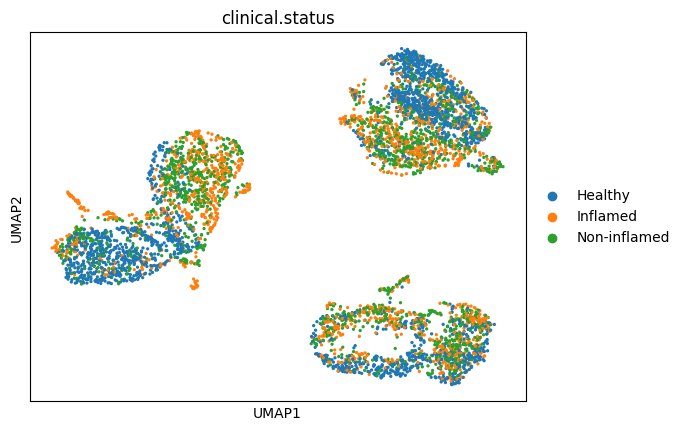

In [4]:
sc.pl.umap(
    adata,
    color=[
        "clinical.status"
    ],
)

In [5]:
dl = pt.tl.Dialogue()

In [6]:
adata, mcps, ws, ct_subs = dl.calculate_multifactor_PMD(
    adata,
    sample_id='clinical.status',
    celltype_key='cell.subtypes',
    n_counts_key = "nCount_RNA",
    mimic_dialogue=True
)

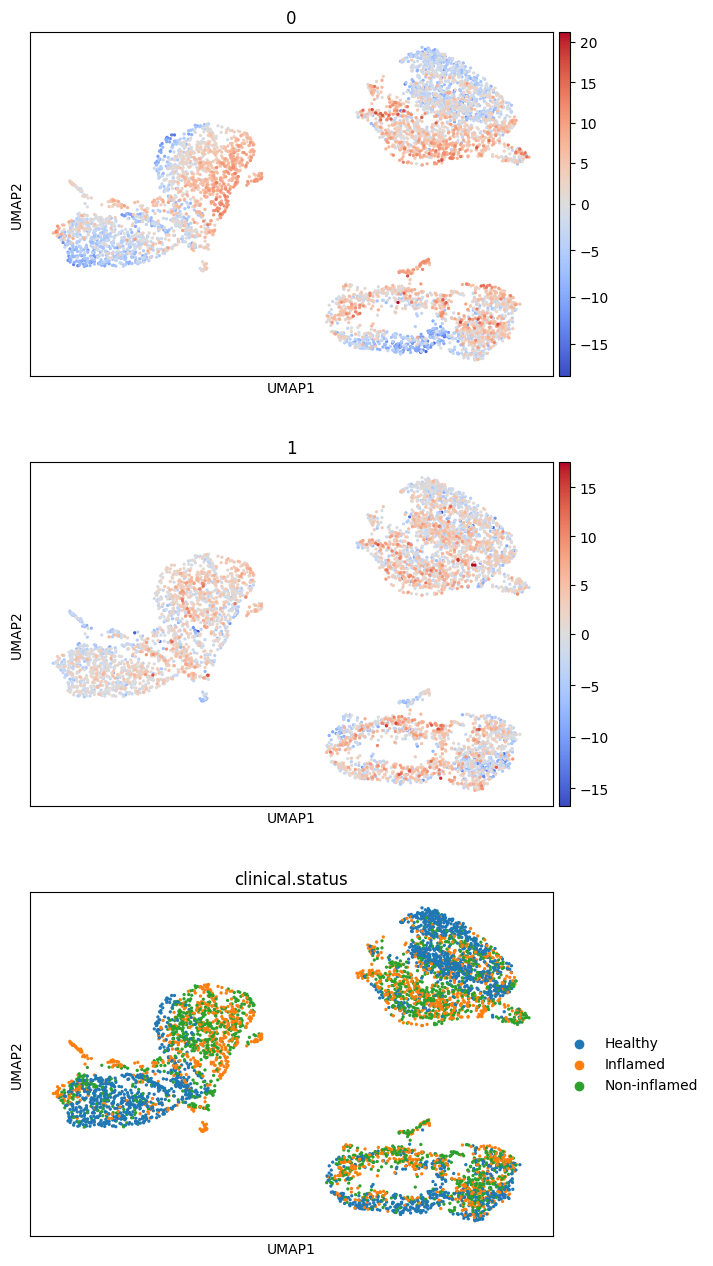

In [7]:
sc.pl.umap(adata, color=[0, 1, 'clinical.status'], ncols=1, cmap='coolwarm', vcenter=0)

In [8]:
all_results = dl.multilevel_modeling(ct_subs=ct_subs,
                                     mcp_scores=mcps,
                                     n_counts_key="nCount_RNA",
                                     n_mcps=3,
                                     sample_id="clinical.status",
                                     confounder="gender",
                                     formula="y ~ x + nCount_RNA",
                                   )

Output()

3 MCPs identified for these cell types.

Output()

Output()

Output()

Output()

Output()

Output()

3 MCPs identified for these cell types.

Output()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/zeth/miniconda3/envs/pertpy/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_174266/3597222669.py", line 1, in <module>
    all_results = dl.multilevel_modeling(ct_subs=ct_subs,
  File "/home/zeth/PycharmProjects/pertpy/pertpy/tools/_dialogue.py", line 668, in multilevel_modeling
    result = {}
  File "/home/zeth/PycharmProjects/pertpy/pertpy/tools/_dialogue.py", line 314, in _apply_HLM_per_MCP_for_one_pair
    # TODO: Ensure that the var names never change throughout all of DIALOGUE -> store them and use them here
  File "/home/zeth/PycharmProjects/pertpy/pertpy/tools/_dialogue.py", line 237, in _mixed_effects
    tme_gene = pd.DataFrame(data={"x": expr_data})
  File "/home/zeth/PycharmProjects/pertpy/pertpy/tools/_dialogue.py", line 198, in _formula_hlm
  File "/home/zeth/miniconda3/envs/pertpy/lib/python3.10/site-package